Importing necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Collecting the dataset

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\loan_prediction.csv")

In [3]:
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


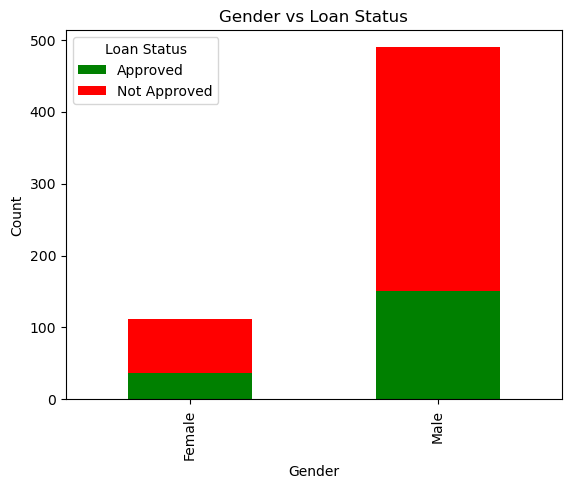

In [8]:
gender_loan = pd.crosstab(data['Gender'],data['Loan_Status'])
gender_loan.plot(kind='bar',stacked=True, color=['green','red'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Loan Status')
plt.legend(title='Loan Status', labels=['Approved','Not Approved'])
plt.show()

Plotting Gender against Loan_Status helps assess potential gender bias in loan approval processes, understand demographic trends in borrowing behavior, ensure compliance with regulatory requirements on fair lending, inform business strategies for targeted marketing or underwriting adjustments, and promote equitable access to credit for all applicants.

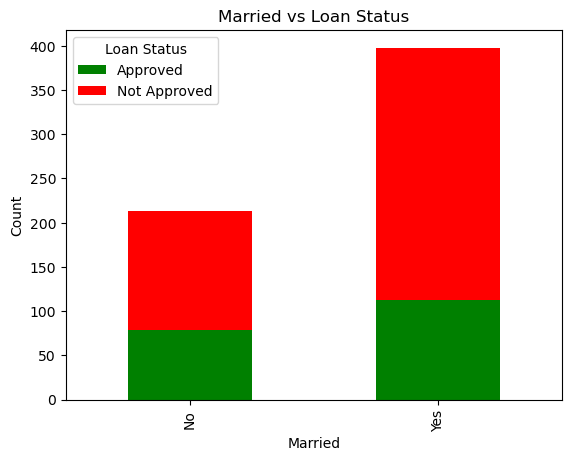

In [9]:
married_loan = pd.crosstab(data['Married'],data['Loan_Status'])
married_loan.plot(kind='bar', stacked=True, color=['green','red'])
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married vs Loan Status')
plt.legend(title='Loan Status', labels=['Approved','Not Approved'])
plt.show()

Plotting Married against Loan_Status is crucial to understand if marital status affects loan approval rates. It aids in risk assessment, informs targeted marketing strategies, guides policy formulation, ensures compliance with regulations, and influences business decision-making within lending institutions.

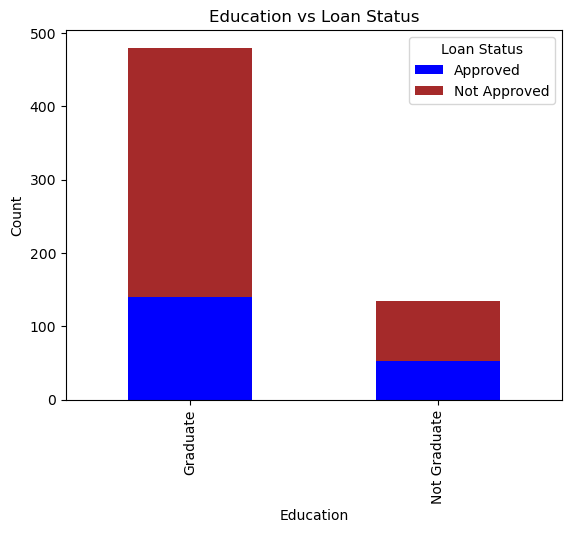

In [10]:
education_loan = pd.crosstab(data['Education'],data['Loan_Status'])
education_loan.plot(kind='bar', stacked=True, color=['blue','brown'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs Loan Status')
plt.legend(title='Loan Status', labels=['Approved','Not Approved'])
plt.show()

Plotting Education against Loan_Status is important to analyze if education level influences loan approval rates. It helps assess risk profiles, tailor marketing strategies, guide policy decisions, ensure regulatory compliance, and inform business strategies within lending institutions.

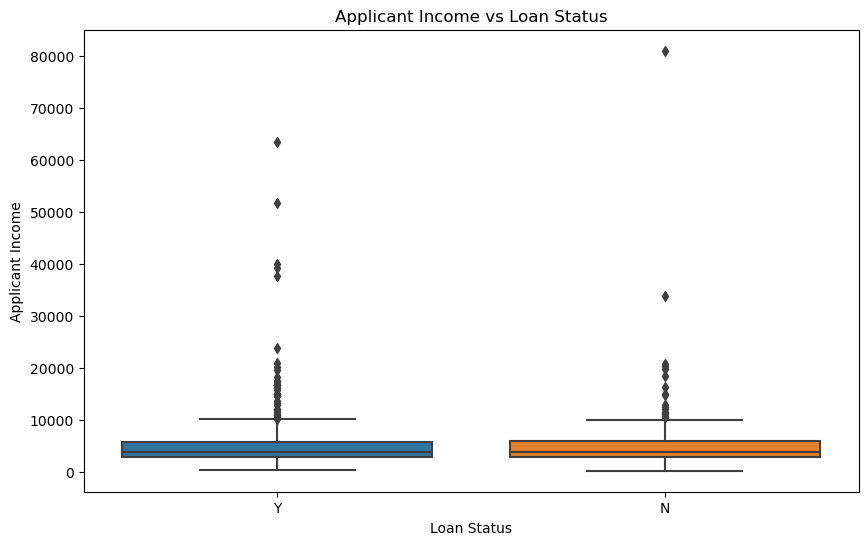

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Applicant Income vs Loan Status')
plt.show()

The box plot displays the distribution of applicant income for approved and not approved loans. The box represents the middle 50% of the data, with the line inside indicating the median. Whiskers extend to the most extreme non-outlier data points within 1.5 times the interquartile range. Outliers, beyond the whiskers, are displayed individually. It provides a concise summary of the income distribution and highlights any differences between loan approval statuses.

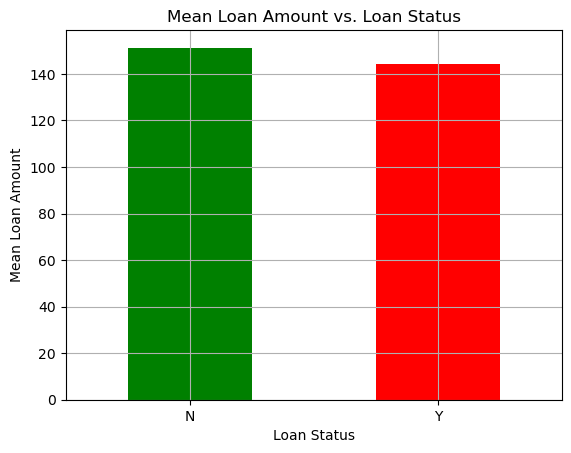

In [12]:
mean_loan = data.groupby('Loan_Status')['LoanAmount'].mean()
mean_loan.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Mean Loan Amount')
plt.title('Mean Loan Amount vs. Loan Status')
plt.grid(True)
plt.xticks(rotation=0) 
plt.show()

This bar chart compares the mean loan amounts for approved and not approved loans. The green bar represents the mean loan amount for approved loans, while the red bar represents the mean loan amount for not approved loans. It provides a clear visual comparison of the average loan amounts between the two loan statuses. The x-axis denotes the loan status, and the y-axis represents the mean loan amount. Grid lines are added for clarity, aiding in interpretation. This visualization enables quick insights into the disparity in mean loan amounts based on loan approval status.

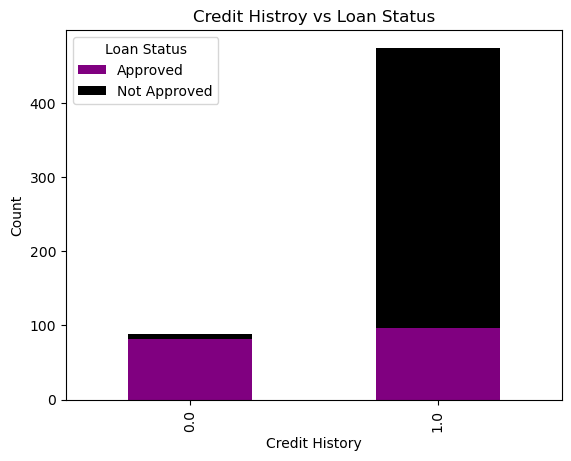

In [13]:
cross_tab = pd.crosstab(data['Credit_History'],data['Loan_Status'])
cross_tab.plot(kind='bar',stacked=True,color=['purple','black'])
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit Histroy vs Loan Status')
plt.legend(title='Loan Status',labels=['Approved','Not Approved'])
plt.show()


This stacked bar chart illustrates the relationship between Credit History and Loan_Status. Each bar represents the count of approved (green) and not approved (red) loans for different credit history categories. It helps assess how credit history influences loan approval rates. Clear distinctions between approval outcomes based on credit history are observable, aiding in understanding the impact of this variable on loan status. This visualization facilitates quick comparison and analysis of loan approval trends across different credit history categories.

In [14]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)
missing_value = data.isnull().sum()
print('Reamining missing values after imputation:\n',missing_value)

Reamining missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])
    
print(data.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  
0             1.0              2           Y  
1             1.0              0           N  
2          

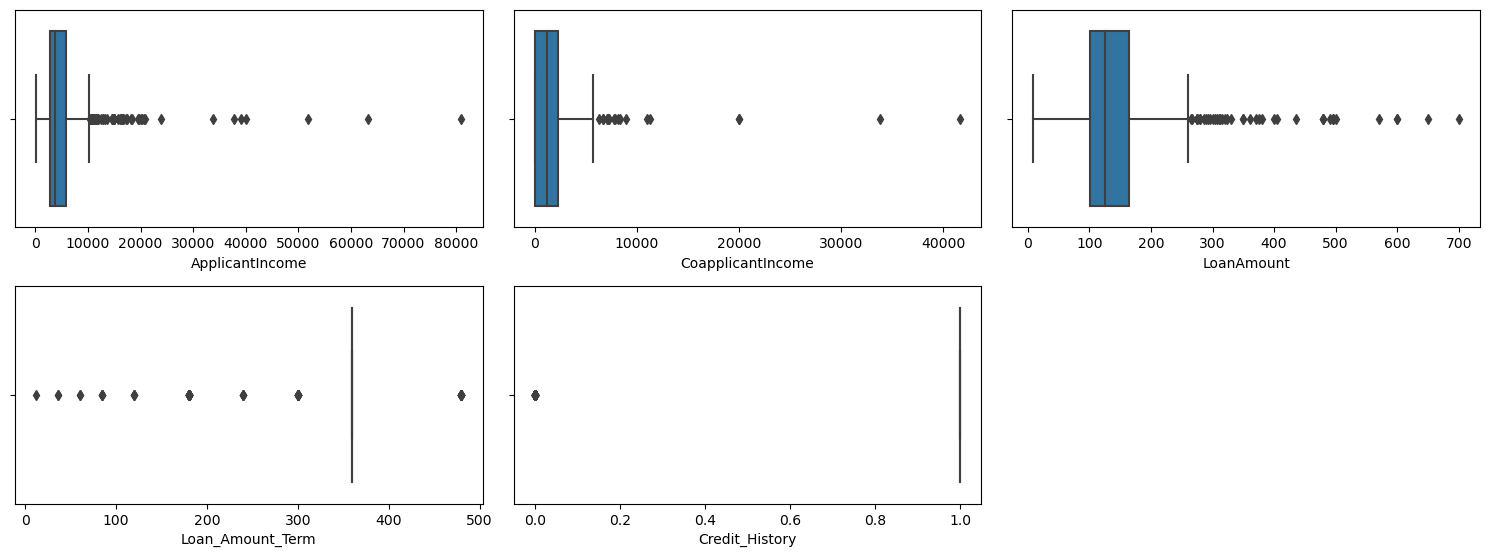

In [16]:
num_features = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,8))
for i, column in enumerate (num_features.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    
    
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats.mstats import winsorize
for column in num_features.columns:
    data[column] = winsorize(data[column], limits=[0.05,0.05])
    
print(data.describe())

           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       4913.416938        1389.211596  139.785016        341.530945   
std        3174.000637        1548.752960   59.595176         52.806410   
min        1880.000000           0.000000   56.0000

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [19]:
data.drop('Loan_ID',axis=1,inplace=True)

In [20]:
print(data['Loan_Status'].unique())

['Y' 'N']


In [21]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})
print(data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [22]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.762446
CoapplicantIncome    0.845835
LoanAmount           1.094445
Loan_Amount_Term    -2.642324
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [23]:
from scipy.stats import boxcox
skewed_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                  'Credit_History', 'Property_Area']
for column in skewed_columns:
    shifted_values = data[column] - data[column].min() + 1
    transformed_values, _ = boxcox(shifted_values)
    data[column] = transformed_values
print(data.head())

      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  26.962358  0.00000    0.000000   0.000000       0.000000        44.519579   
1  26.962358  2.14379    0.452583   0.000000       0.000000        38.808817   
2  26.962358  2.14379    0.000000   0.000000       0.092917        28.172963   
3  26.962358  2.14379    0.000000   0.158523       0.000000        23.694513   
4  26.962358  0.00000    0.000000   0.000000       0.000000        45.114681   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000   14.301012      12263.589429       95.303566   
1           9.450524   15.282975      12263.589429       95.303566   
2           0.000000    4.663152      12263.589429       95.303566   
3          10.191669   14.301012      12263.589429       95.303566   
4           0.000000   16.771118      12263.589429       95.303566   

   Property_Area  Loan_Status  
0       1.715539            1  
1       0.000000            0  
2 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=100)
model = RandomForestClassifier(random_state=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('CLassification Report:\n', classification_report(y_test,y_pred))

Accuracy: 0.7560975609756098
CLassification Report:
               precision    recall  f1-score   support

           0       0.82      0.48      0.61        48
           1       0.74      0.93      0.82        75

    accuracy                           0.76       123
   macro avg       0.78      0.71      0.71       123
weighted avg       0.77      0.76      0.74       123



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('CLassification Report:\n', classification_report(y_test,y_pred))

Accuracy: 0.7317073170731707
CLassification Report:
               precision    recall  f1-score   support

           0       0.86      0.38      0.52        48
           1       0.71      0.96      0.81        75

    accuracy                           0.73       123
   macro avg       0.78      0.67      0.67       123
weighted avg       0.76      0.73      0.70       123



Random Forest provides a better accuracy of 75% 